<a href="https://colab.research.google.com/github/tdushio/shiolabOpen/blob/master/34_%E3%82%B9%E3%83%86%E3%83%83%E3%83%97%E7%8A%B6%E5%A4%96%E4%B9%B1%E3%81%A8%E7%9B%AE%E6%A8%99%E5%80%A4%E3%81%AB%E5%AF%BE%E3%81%99%E3%82%8B%E3%83%AD%E3%83%90%E3%82%B9%E3%83%88%E3%82%B5%E3%83%BC%E3%83%9C%E7%B3%BB.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# 34.ステップ状外乱と目標値に対するロバストサーボ系

外乱とは、出力信号に影響を与えるが操作することができない入力信号を指す。
また、目標値とは出力信号が追従する目的で意図的に注入される到達目標信号である。
ステップ状信号とは階段状に値が不連続に変化したあと一定値を保持する信号である。
サーボ系とは出力信号が目標信号に誤差ゼロで追従するシステムであり、
外乱に対するロバストサーボ系とは、外乱が存在してもサーボ系の目的である
追従誤差ゼロを達成する頑健な制御系

サーボ問題とはサーボ系を構成するための制御系を設計する設計問題である。
すなわち、外乱と目標信号が一定値である場合について、
以下の制御目的を達成する状態フィードバック制御器を構成する。
1.   外乱$d$から出力$y$への影響は$0$に収束する
2.   出力$y$は目標信号$r$に収束する
（偏差$e=y-r$が$0$に収束すると言い換えることもできる。）

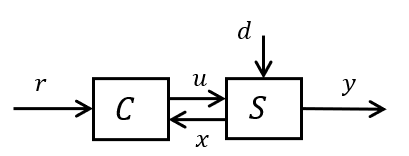


## 制御対象のモデル
倒立振子のモデルを
$1$ 入力$1$出力$4$次の線形時不変システム(LTI)で与える。<br>
\begin{equation}
   \dot{x}(t) = A x(t) + B u(t) + G d(t) , \; x(0)=x_0  \\
    y(t) = C x(t),\;\;   \\
    e(t) = y(t) - r(t)  
\end{equation}
ここで、状態$x(t)\in{\mathrm R}^4$は
$x=[z,\theta,\dot{z},\dot{\theta}]^\top$、
$u(t)\in{\mathrm R}$はモータへの入力である。
目標値に追従させたい出力は台車の位置$y(t)=z(t)\in{\mathrm R}$とする。
$x_0\in{\mathrm R}^4$は初期状態を表す。

$d(t)$ は外乱信号$r(t)$は目標信号$e(t)$は制御偏差である。
ステップ状信号の仮定は以下のように書くことができる。
1.   $\dot{d}(t)=0,\; t>0$
2.   $\dot{r}(t)=0,\; t>0$

## 制御の目的(ロバストサーボ問題)

この制御対象に対し、
任意の$r_0, d_0$に対して、
$e(t) = y(t)-r(t)\to 0$
となる制御系を構成する。
これをステップ状外乱に対するロバストサーボ問題と呼ぶ。

## 拡大系による問題の変形

偏差$e$の時間積分を$\eta$とおく。
つまり、$\dot{\eta}=e$である。
拡大系の状態変数 $x_b$ を以下のように定義する。
\begin{equation}
    x_b =
    \left[ \begin{array}{c} x \\ \eta \end{array} \right]
    = \left[ \begin{array}{ccccc}
    z & \theta & \dot{z} & \dot{\theta} & \eta \end{array} \right]^\top
\end{equation}
この定義にもとづくと、拡大系は
\begin{equation}
   \dot{x}_b(t) =
   \left[ \begin{array}{cc} A & 0 \\ C & 0 \end{array} \right] x_b(t)
+    \left[ \begin{array}{c} B \\ D \end{array} \right] u(t)
+     \left[ \begin{array}{rr} G & 0 \\ 0 & -1 \end{array} \right]
      \left[ \begin{array}{c} d(t) \\ r(t) \end{array} \right] \\
      \eta(t) =  [O_{1\times 4},1]x_b(t)
\end{equation}
となる。

ここで $x_a$を
\begin{equation}
    x_a = \dot{x}_b
    = \left[ \begin{array}{c} \dot{x} \\ \dot{\eta} \end{array} \right]
    = \left[ \begin{array}{c} \dot{x} \\ e \end{array} \right]
\end{equation}
と定義し、拡大系の両辺を$t$で微分すると
$\dot{t}$を入力とした以下の状態空間モデルが得られる。
\begin{equation}
   \dot{x}_a(t) =
   \left[ \begin{array}{cc} A & 0 \\ C & 0 \end{array} \right] x_a(t)
+    \left[ \begin{array}{c} B \\ D \end{array} \right] \dot{u}(t) \\
    e(t) =
    \left[ \begin{array}{cc} O & I \end{array} \right] x_a(t)
\end{equation}
という$d,r$を含まない拡大系が得られる。

この拡大系に対して評価関数を
\begin{equation}
  J = \int_0^\infty
  \left( x_a^\top(t)Qx_a(t) + \dot{u}^\top(t)R\dot{u}(t)
  \right)  \mathrm{d}t
\end{equation}
とおいたLQR問題を解いて、状態フィードバック則
\begin{equation}
    \dot{u} = -K x_a = -K_1 \dot{x}-K_2 e
\end{equation}
が得られたとすると、この両辺を$t$で積分することにより
\begin{equation}
    u(t) = -K_1 x(t) + K_2 \int^t e(\tau){\mathrm d}\tau
\end{equation}
というPI制御則が得られる。
評価関数が有界であるためには $e(t)\to 0$は必要条件であり、
この問題が可解であれば、上記のロバストサーボ問題は可解であることがわかる。
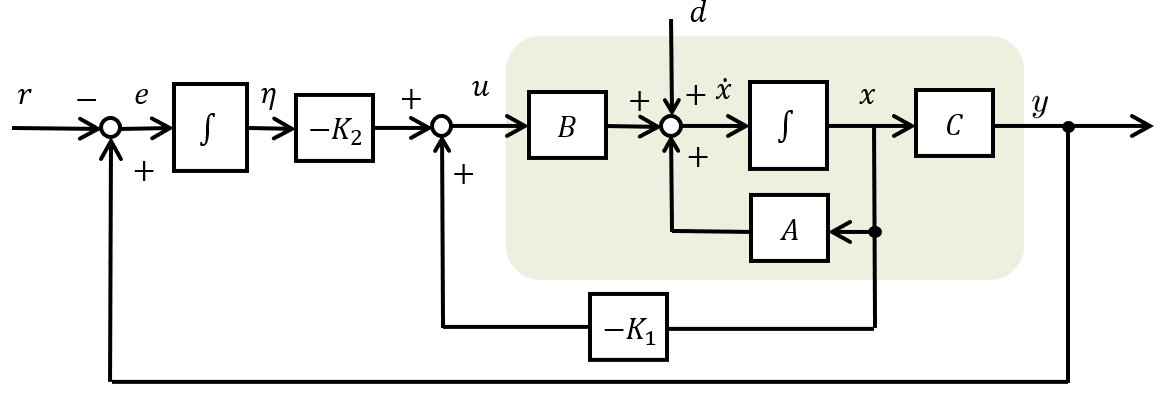


# モジュールのインストール
以下のライブラリを使用する。


*   numpy
*   matplotlib
*   control (制御工学ライブラリ)


### <参考>
<A href="https://python-control.readthedocs.io/en/0.10.0/">制御工学モジュール control のドキュメント</a><br>
<A href="https://numpy.org/doc">numpy のドキュメント</A><br>
<A href="https://matplotlib.org/stable/index.html">matplotlib のドキュメント</A><br>


In [65]:
import numpy as np
import cvxpy as cp
# !pip install slycot
!pip install control
from control import matlab   # matlab 互換関数を使用する場合
import matplotlib.pyplot as plt

# プログラム

1. 制御対象のモデル
2. 可制御性（解の存在条件）の確認
3. リッカチ方程式を解く
4. 状態フィードバックゲインを求める
5. シミュレーション




# 制御対象のモデル
倒立振子のモデルを
$1$ 入力$2$出力$4$次の線形時不変システム(LTI)で与える。<br>
\begin{equation}
   \dot{x}(t) = A x(t) + B u(t) + G d(t) , \;x(0)=x_0  \nonumber \\
    y(t) = C x(t) + D u(t) ,\;\; \\
    e(t) = y(t) - r(t)
\end{equation}
ここで、$u(t)\in{\mathrm R}$はモータへの入力,
$y(t)\in{\mathrm R}$は出力,
$x(t)\in{\mathrm R}^4$は状態の時刻$t\in [0,T_f]$での値を成分とする列ベクトルである。<br>
$\dot{x}$は状態$x$の導関数を表す。<br>
$A\in{\mathrm R}^{4\times 4}$,
$B\in{\mathrm R}^{4\times 1}$,
$C\in{\mathrm R}^{1\times 4}$,
$D\in{\mathrm R}^{1\times 1}$は定数行列である.<br>
$x_0\in{\mathrm R}^4$は初期状態を表す。


制御対象に関わる物理量

In [66]:
l = 0.15             # 振子の長さ
m = 0.0402           # 振子の質量
Jp = 0.00030142      # 振子の慣性モーメント
M = 0.6862           # 台車の質量
Jt = 1.34 * 10**(-4)
Jm = 1.30 * 10**(-7)
Jc = Jt + Jm
r = 0.02485
F = 0.36
c = 0.0015
g = 9.80665
a = 1.9

p = M + m + Jc/(r*r)
q = Jp + m*l*l
W = 1/(p * q - m * m * l * l)


係数行列の作成

In [67]:
A = np.array([
    [0, 0, 1, 0],
    [0, 0, 0, 1],
    [0, -m*m*g*l*l*W, -F*q*W, c*m*l*W],
    [0, m*g*l*p*W, F*m*l*W, -c*p*W]
    ])
B = np.array([[0, 0, a*q*W, -a*m*l*W]]).T
C = np.array([[1, 0, 0, 0]])
D = np.zeros((1, 1))
G = B

sys = matlab.ss(A, B, C, D)                # 制御対象のオブジェクトを定義する
print(type(sys))

<class 'control.statesp.StateSpace'>


## 拡大系を作る

偏差$e$の時間積分を$\eta$とおく。
つまり、$\dot{\eta}=e$である。
拡大系の状態変数 $x_b$ を $\dot{x}_b = x_a$ で定義し
\begin{equation}
    x_b =
    \left[ \begin{array}{c} x \\ \eta \end{array} \right]
    = \left[ \begin{array}{ccccc}
    z & \theta & \dot{z} & \dot{\theta} & \eta \end{array} \right]^\top
\end{equation}
と書くこととする。

この定義にもとづくと、拡大系は
\begin{equation}
   \dot{x}_b(t) =
   \left[ \begin{array}{cc} A & 0 \\ C & 0 \end{array} \right] x_b(t)
+    \left[ \begin{array}{c} B \\ D \end{array} \right] u(t)
+     \left[ \begin{array}{rr} G & 0 \\ 0 & -1 \end{array} \right]
      \left[ \begin{array}{c} d(t) \\ r(t) \end{array} \right] \\
      \eta(t) =  [0,0,0,0,1]x_b
\end{equation}
となる。


In [72]:
n1 = A.shape[0]
p1 = C.shape[0]
m1 = B.shape[1]

Z41 = np.ma.zeros((n1,p1))
Z11 = np.ma.zeros((p1,p1))
Z14 = np.ma.zeros((p1,n1))
Aa = np.bmat([[A, Z41],[C, Z11]])
Ba = np.bmat([[B],[D]])
Ca = np.matrix([[0,0,0,0,1]])
Da = np.ma.zeros((p1,m1))
Ga = np.bmat([[G, Z41],[np.matrix([0,-1])]])

sys_aug = matlab.ss(Aa, Ba, Ca, Da)
print(sys_aug)
print(Ga)

<StateSpace>: sys[18]
Inputs (1): ['u[0]']
Outputs (1): ['y[0]']
States (5): ['x[0]', 'x[1]', 'x[2]', 'x[3]', 'x[4]']

A = [[ 0.00000000e+00  0.00000000e+00  1.00000000e+00  0.00000000e+00
       0.00000000e+00]
     [ 0.00000000e+00  0.00000000e+00  0.00000000e+00  1.00000000e+00
       0.00000000e+00]
     [ 0.00000000e+00 -3.23705297e-01 -3.94108231e-01  8.21113282e-03
       0.00000000e+00]
     [ 0.00000000e+00  5.06551367e+01  1.97067188e+00 -1.28492199e+00
       0.00000000e+00]
     [ 1.00000000e+00  0.00000000e+00  0.00000000e+00  0.00000000e+00
       0.00000000e+00]]

B = [[  0.        ]
     [  0.        ]
     [  2.08001566]
     [-10.40076824]
     [  0.        ]]

C = [[0. 0. 0. 0. 1.]]

D = [[0.]]

[[  0.           0.        ]
 [  0.           0.        ]
 [  2.08001566   0.        ]
 [-10.40076824   0.        ]
 [  0.          -1.        ]]


# 解の存在条件を確認する

## サーボ条件を確認する


In [73]:
S = np.bmat([[Aa,Ba],[Ca,Da]])
print(S)
rank = np.linalg.matrix_rank(S)
print(rank)

[[ 0.00000000e+00  0.00000000e+00  1.00000000e+00  0.00000000e+00
   0.00000000e+00  0.00000000e+00]
 [ 0.00000000e+00  0.00000000e+00  0.00000000e+00  1.00000000e+00
   0.00000000e+00  0.00000000e+00]
 [ 0.00000000e+00 -3.23705297e-01 -3.94108231e-01  8.21113282e-03
   0.00000000e+00  2.08001566e+00]
 [ 0.00000000e+00  5.06551367e+01  1.97067188e+00 -1.28492199e+00
   0.00000000e+00 -1.04007682e+01]
 [ 1.00000000e+00  0.00000000e+00  0.00000000e+00  0.00000000e+00
   0.00000000e+00  0.00000000e+00]
 [ 0.00000000e+00  0.00000000e+00  0.00000000e+00  0.00000000e+00
   1.00000000e+00  0.00000000e+00]]
6


## 可制御性条件を確認する


In [74]:
Mc = np.asmatrix(Ba)
Aa = np.asmatrix(Aa)
Mc = np.bmat([Ba, (Aa*Mc)])
Mc = np.bmat([Ba, (Aa*Mc)])
Mc = np.bmat([Ba, (Aa*Mc)])
Mc = np.bmat([Ba, (Aa*Mc)])
print(Mc)
print(Mc.shape)
rank = np.linalg.matrix_rank(Mc)
print(rank)
if rank==n1+p1:
  print('Controllable')
else:
  print('Not controllable')

[[ 0.00000000e+00  2.08001566e+00 -9.05153382e-01  3.86690486e+00
  -1.17018604e+01]
 [ 0.00000000e+00 -1.04007682e+01  1.74632042e+01 -5.51074953e+02
   1.60030973e+03]
 [ 2.08001566e+00 -9.05153382e-01  3.86690486e+00 -1.17018604e+01
   1.96138036e+02]
 [-1.04007682e+01  1.74632042e+01 -5.51074953e+02  1.60030973e+03
  -2.99941107e+04]
 [ 0.00000000e+00  0.00000000e+00  2.08001566e+00 -9.05153382e-01
   3.86690486e+00]]
(5, 5)
5
Controllable


## 可観測条件を確認する

In [75]:
Mo = Ca
Mo = np.bmat([[Ca],[Mo@Aa]])
Mo = np.bmat([[Ca],[Mo@Aa]])
Mo = np.bmat([[Ca],[Mo@Aa]])
Mo = np.bmat([[Ca],[Mo@Aa]])
rank = np.linalg.matrix_rank(Mo)
print(rank)
if rank==n1+p1:
  print('Observable')
else:
  print('Not observable')

5
Observable


# 状態フィードバックゲインを求める
LQR問題としてリッカチ方程式を解き、状態フィードバックゲインを求める

In [76]:
Q = np.diag(np.array([0,0,0,0,1]))
R = np.array([[1]])
K,P,E = matlab.lqr(sys_aug,Q,R)      # matlab.lqr() を使用した場合
# P,L,G = matlab.care(Aa,Ba,Q,R)        # matlab.care() を使用した場合
# K =  np.linalg.inv(R)@Ba.T@P
print(K)
print(E)

[[ -1.90380394 -14.40522139  -2.0017084   -1.85972355  -1.        ]]
[-7.79586314+0.j        -6.4983135 +0.j        -0.64095315+1.0769237j
 -0.64095315-1.0769237j -1.28191615+0.j       ]


# シミュレーション
## 閉ループ系の構成
拡大系に状態フィードバック
\begin{equation}
  u(t) = -Kx_b(t) = -K_1 x(t) -K_2 \eta(t)
\end{equation}
を組み込んで得られる閉ループ系は以下で与えられる.
\begin{equation}
   \dot{x}_b(t) =
   \left[ \begin{array}{cc} A-B K_1 & B K_2 \\
              C-DK_1 & D K_2 \end{array} \right] x_b(t)
+     \left[ \begin{array}{rr} G & 0 \\ 0 & -1 \end{array} \right]
      \left[ \begin{array}{c} d(t) \\ r(t) \end{array} \right]
\end{equation}
ここでは $z,\theta$を出力信号として取り出す。
\begin{equation}
    \left[ \begin{array}{c} z(t) \\ \theta(t) \end{array} \right] =
    \left[ \begin{array}{cc} 1&0&0&0&0 \\ 0&1&0&0&0 \end{array} \right] x_b(t)
\end{equation}

In [80]:
A_ = Aa - Ba * K
B_ = Ga
C_  = np.matrix([[1,0,0,0,0],[0,1,0,0,0]])
D_  = np.matrix([[0,0],[0,0]])

sys_cl = matlab.ss(A_, B_, C_, D_)       # 閉ループ系の状態空間モデル
print(sys_cl)

<StateSpace>: sys[20]
Inputs (2): ['u[0]', 'u[1]']
Outputs (2): ['y[0]', 'y[1]']
States (5): ['x[0]', 'x[1]', 'x[2]', 'x[3]', 'x[4]']

A = [[  0.           0.           1.           0.           0.        ]
     [  0.           0.           0.           1.           0.        ]
     [  3.959942    29.63938081   3.76947659   3.87646525   2.08001566]
     [-19.80102352 -99.17023252 -18.84863326 -20.62747569 -10.40076824]
     [  1.           0.           0.           0.           0.        ]]

B = [[  0.           0.        ]
     [  0.           0.        ]
     [  2.08001566   0.        ]
     [-10.40076824   0.        ]
     [  0.          -1.        ]]

C = [[1. 0. 0. 0. 0.]
     [0. 1. 0. 0. 0.]]

D = [[0. 0.]
     [0. 0.]]



## 時間応答の観察
matlab.lsimで、目標値追従特性と外乱除去特性を観察する.

In [97]:
# 目標値追従特性と外乱除去特性を観察する
Td = np.arange(0, 50, 0.05)    #シミュレーション時間
N = len(Td)
N1 = int(N/5)
N2 = int(2*N/5)
N3 = int(3*N/5)
N4 = int(4*N/5)
d = np.zeros(N).reshape((1,N))
d[0,N1:N2] = np.ones(N2-N1)
r = np.zeros(N).reshape((1,N))
r[0,N3:N4] = np.ones(N4-N3)

# u = np.append(d,r,axis=0).reshape((2,N))
u = np.bmat([[d],[r]]).T

x0 = np.array([1,0,0,0,0]).reshape((5,1))
y, t, x = matlab.lsim(sys_cl, u, Td, x0 )
z = y[:,0]
e = z - r.squeeze()
th = y[:,1]

(1000, 2)
(1, 1000)
(1000,)
(1000,)


応答波形を描画する

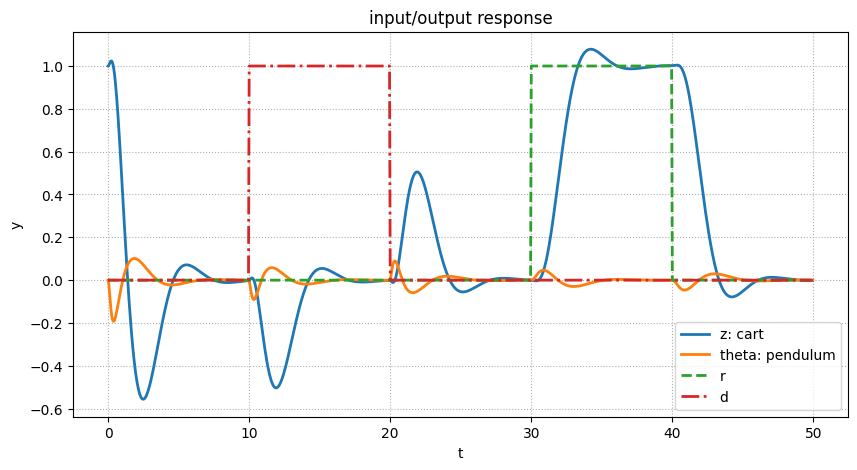

In [98]:
# 初期値応答の描画
fig, ax = plt.subplots(figsize=(10,5))
r = r.squeeze()
d = d.squeeze()
ax.plot(t, z,  ls = '-',  lw = 2.0, label = 'z: cart')
ax.plot(t, th, ls = '-',  lw = 2.0, label = 'theta: pendulum')
# ax.plot(t, e, ls = '-',  lw = 2.0, label = 'e: position error')
ax.plot(t, r, ls = '--', lw = 2.0, label = 'r')
ax.plot(t, d, ls = '-.', lw = 2.0, label = 'd')
ax.set_title('input/output response')
ax.set_xlabel('t')
ax.set_ylabel('y')
ax.grid(ls=':')
ax.legend(loc='best')
plt.show()

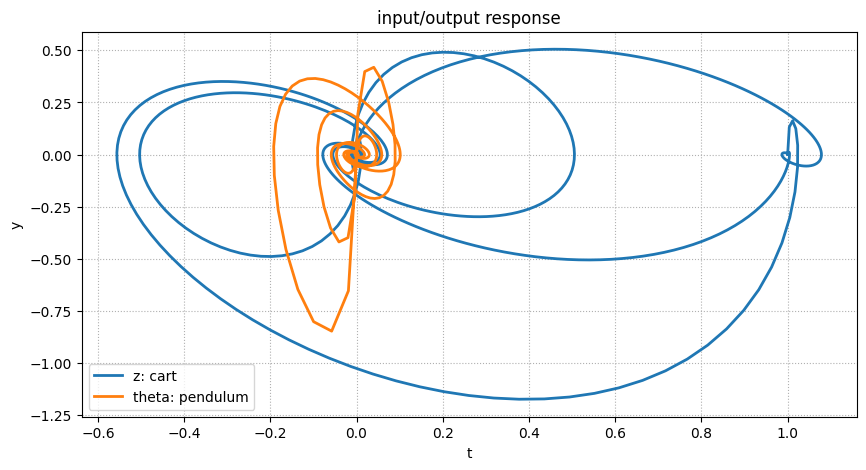

In [99]:
# 初期値応答の描画
fig, ax = plt.subplots(figsize=(10,5))
ax.plot(x[:,0], x[:,2],  ls = '-',  lw = 2.0, label = 'z: cart')
ax.plot(x[:,1], x[:,3], ls = '-',  lw = 2.0, label = 'theta: pendulum')
ax.set_title('input/output response')
ax.set_xlabel('t')
ax.set_ylabel('y')
ax.grid(ls=':')
ax.legend(loc='best')
plt.show()